In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.isnull().sum()
df.duplicated().sum()

0

In [7]:
df.drop(columns=['Unnamed: 0'],inplace=True)

<Figure size 800x600 with 0 Axes>

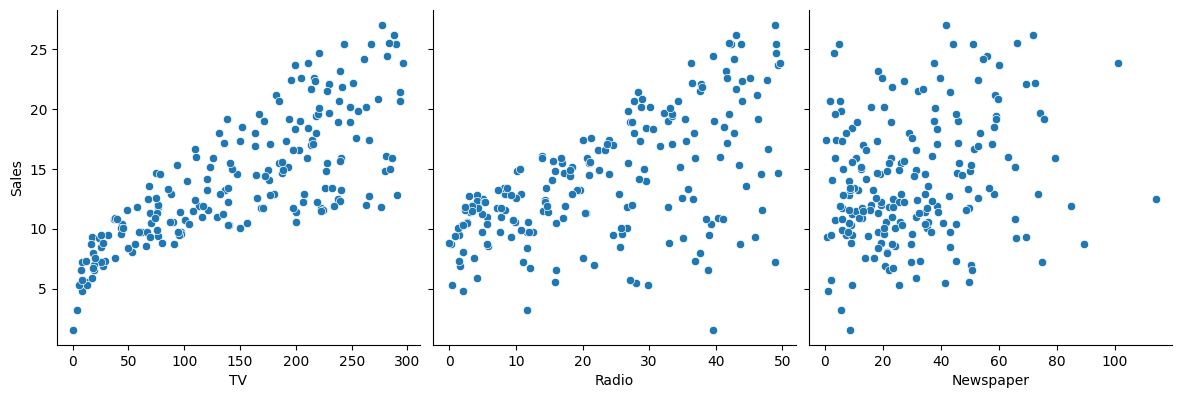

In [8]:
plt.figure(figsize=(8,6))
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

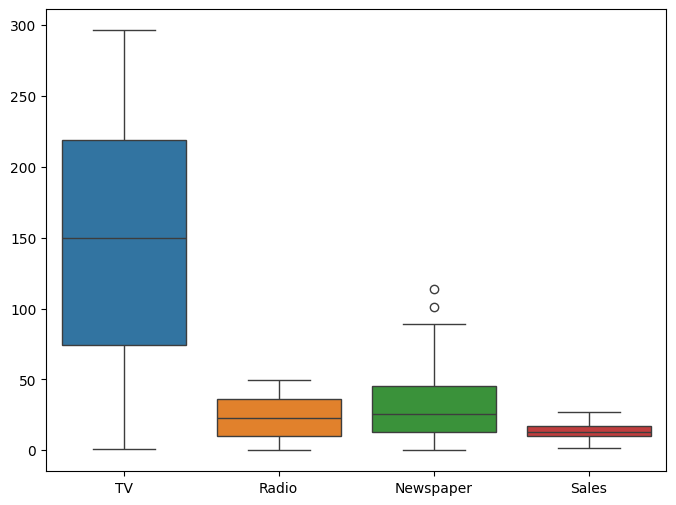

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(df)
plt.show()


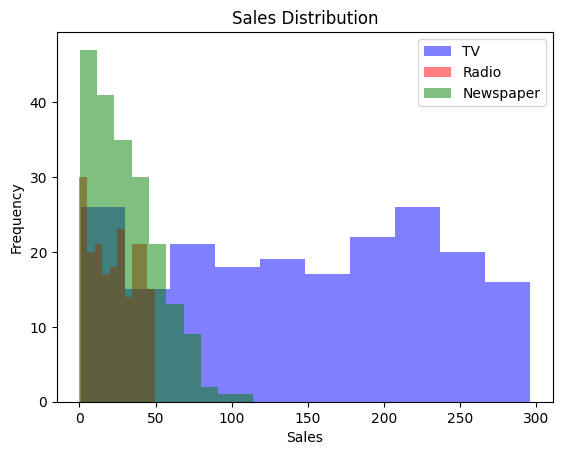

In [10]:
plt.figsize=(6,4)

plt.hist(df['TV'], bins=10, color='blue', alpha=0.5)
plt.hist(df['Radio'], bins=10, color='red', alpha=0.5)
plt.hist(df['Newspaper'], bins=10, color='green', alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution')
plt.legend(['TV', 'Radio', 'Newspaper'])
plt.show()


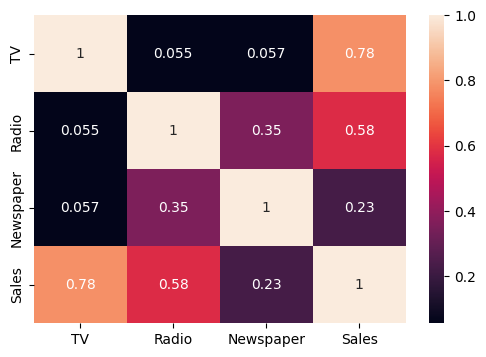

In [11]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True)
plt.show()



In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Sales', axis=1), df['Sales'], test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
x=df.drop('Sales',axis=1)
y=df['Sales']


In [15]:
predict=model.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predict)
r2 = r2_score(y_test, predict)

In [17]:
accuracy=r2_score(y_test,predict)
print(accuracy)


0.899438024100912


In [18]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [19]:
from sklearn.metrics import r2_score
predict=model.predict(x_test)
accuracy=r2_score(y_test,predict)
print(accuracy)

0.9819292448281495


In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
model = Lasso()
model.fit(x_train, y_train)


Lasso()

In [21]:
predict=model.predict(x_test)
accuracy=r2_score(y_test,predict)
print(accuracy)


0.9004013443377963
